<a href="https://colab.research.google.com/github/JulioCesarMS/StochasticProcesses/blob/main/6_Stochastic_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stochastic simulation**

In [4]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from random import sample
#!pip install mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")
#sns.set()

In [8]:
class StochasticSimulation:
  
    def __init__(self, steps=100, n_times=1, t=1):
        self.steps = steps
        self.n_times = n_times 
        self.dt = t  #/ steps
    
    
    def SimpleRandomWalk(self, p):
        # creating array
        rw = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(rw.shape[1]-1):
            for i in range(rw.shape[0]):
                rw[i][j+1] = rw[i][j] + np.random.choice([-1,1], p=[1-p, p])#sample([-1,1], 1)
    
        df = pd.DataFrame(rw) 
        return df 
    
    def BrownianMotion(self):
        # creating array
        bm = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(bm.shape[1]-1):
            for i in range(bm.shape[0]):
                bm[i][j+1] = bm[i][j] + np.random.normal(size=1)
    
        df = pd.DataFrame(bm)  
        return df

    def BrownianBridge(self):
        # creating Brownian motion
        bm = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(bm.shape[1]-1):
            for i in range(bm.shape[0]):
                bm[i][j+1] = bm[i][j] + np.random.normal(size=1)
        # array of Brownian Bridge
        bb = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(bb.shape[1]-1):
            for i in range(bb.shape[0]):
                bb[i][j+1] = bm[i][j] + -(j/self.steps)*bm[i][self.steps]
    
        df = pd.DataFrame(bb)  
        return df

    def BrownianMotionDrift(self, mu, sigma):
        # creating array
        bmd = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(bmd.shape[1]-1):
            for i in range(bmd.shape[0]):
                bmd[i][j+1] = bmd[i][j] + mu*self.dt  + sigma*np.sqrt(self.dt)*np.random.normal(size=1)
    
        df = pd.DataFrame(bmd)  
        return df

# **Brownian Motion**

**Definición:**

Un proceso estocástico $\{B(t), t\geq 0\}$  se dice que es un movimoento Browniano si:

1.- $B(0) = 0$

2.- $\{B(t), t\geq 0\}$ tiene incrementos independientes y estacionarios.

3.- Para $t>0$, B(t) tiene distribución normal con media cero y varianza $t$. 

In [ ]:
# simulation
steps = 10000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).BrownianMotion()
bm_sim.shape

(100, 10001)

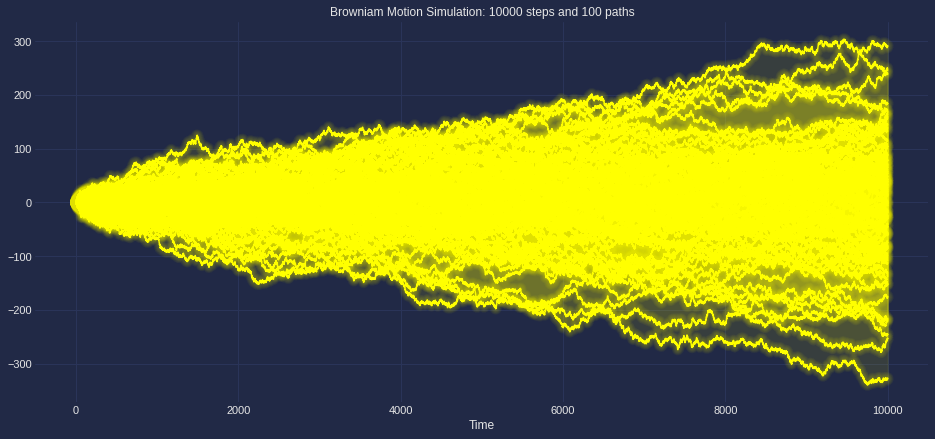

In [ ]:
# plotting Brownian motion
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Browniam Motion Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

# **Brownian Bridge**

**Definición:**

Un procesos estocástico $\{X(t)= B(t) - \frac{t}{T} B(T) , 0 \leq t \leq T \}$,  es un puente Browniano si satisface las siguientes propiedades:

1.- $X(0)=X(T)=0$

2.- $X(t)$ se distribuye como una normal con media cero y varianza $t(1-t/T)$

$$E(X(t)) = 0$$,  y $$Var(X(t)) = t(1-t/T)$$

3.- $Cov(X(s), X(t)) = min(s, t) - \frac{st}{T}$

In [9]:
# simulation
steps = 10000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).BrownianBridge()
bm_sim.shape

(100, 10001)

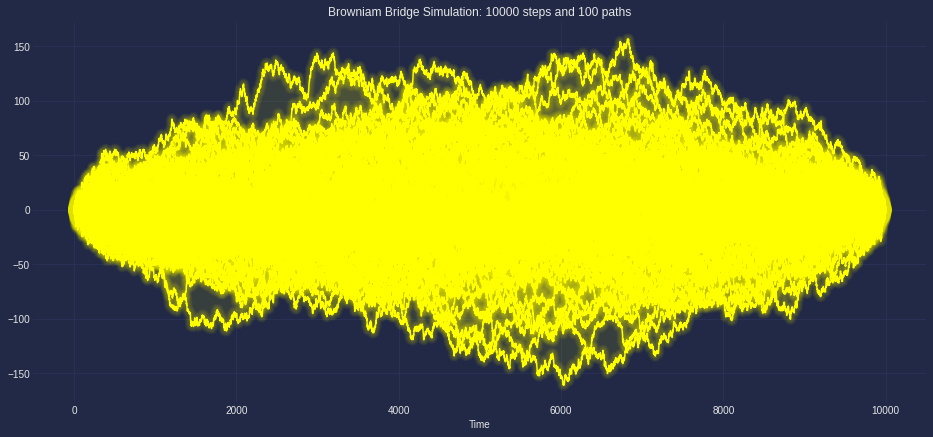

In [11]:
# plotting Brownian motion
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Browniam Bridge Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

# **Simple Random Walk**

La caminata aleatoria en $\mathbb{Z}$, es la más simple de todas, de ahí su nombre. $X_i$ toma valores en $\{−1,1\}$, y la caminata comienza en $S_n = 0$ y está definida para valores enteros. Las probabilidades de ir a la derecha o a la izquierda se denotan como $P(X_i=1)$ y $P(X_i=-1)$, respectivamente, con las siguientes probabilidades para el caso de una caminata aleatoria simétrica:


\begin{equation*}
P(X_i=1)=P(X_i=−1)=1/2
\end{equation*}


Considerando el caso más general, se tiene que el caminante puede ir a la derecha con probabilidad $p$, y a la izquierda con probabilidad $1-p$


\begin{equation*}
P(X_i=1)=p \ \text{  y  } \  P(X_i=−1)=1−p
\end{equation*}

In [ ]:
# simulation
steps = 10000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).SimpleRandomWalk(p=0.5)
bm_sim.shape

(100, 10001)

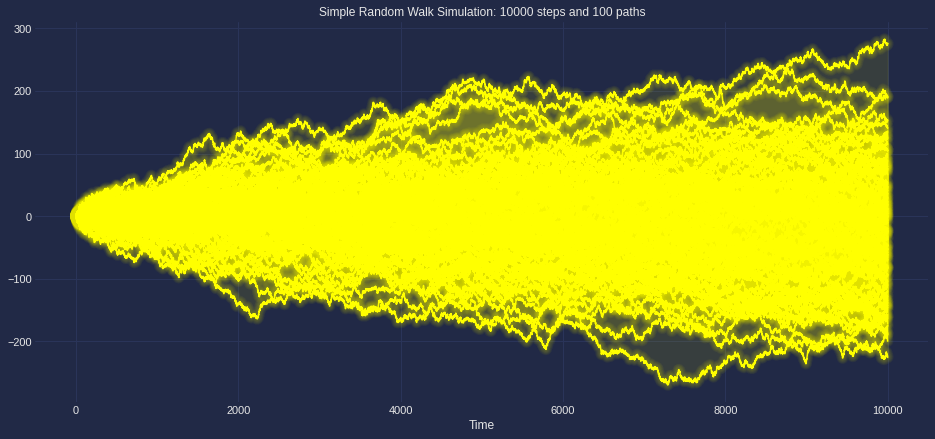

In [ ]:
# plotting Brownian motion
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Simple Random Walk Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

# **Brownian Motion with Drift and Volatility**

**Definición:**

Sea $\{B(t), t \geq 0\}$ un movimiento Browniano estándar. El procesos estocástico $\{X(t)= \mu t + \sigma B(t), t \geq 0\}$ recibe el nombre de movimiento Browniano con coeficiente de deriva (drift) $\mu$, y coeficiente de volatilidad (o difusión) $\sigma$.

**Poposición**

La distribucuión de $X(t)$ es normal con media $\mu t$, y varianza $\sigma^2 t$. Y la covarianza entre $X(s)$ y $X(t)$ es
$$Cov(X(s), X(t)) = \sigma^2 min(s, t)$$.

In [13]:
# simulation
steps = 10000
n = 100 # paths
bmd_sim = StochasticSimulation(steps=steps, n_times=n).BrownianMotionDrift(mu=0.03, sigma=0.8)
bmd_sim.shape

(100, 10001)

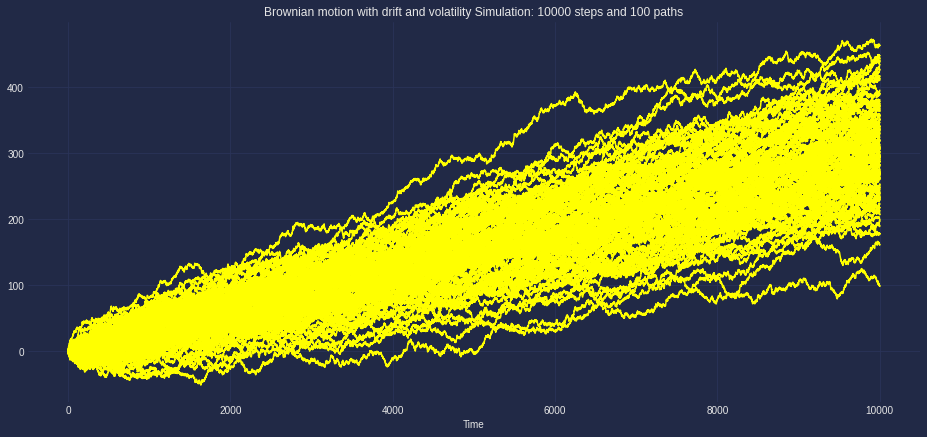

In [14]:
# plotting Brownian motion with drift and volatility
plt.figure(figsize=(16,7))
for i in range(bmd_sim.shape[0]):
    plt.plot(list(bmd_sim.columns), bmd_sim.iloc[i][:], color='yellow')
plt.title('Brownian motion with drift and volatility Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()